In [1]:
import numpy as np
from ase import Atoms
import ase.visualize
from ase.units import Bohr
from pyscf import gto, scf, mp, cc, dft
import glob
from matplotlib import pyplot as plt

import pandas as pd
import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
from parse_density_files import CUBE
import alchemy_tools2 as at
import explore_qml_data as eqd


In [3]:
results = uqm.load_obj('/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/bond_stretch/butanol/dist_0.0/results.dict')

In [4]:
results.keys()

dict_keys(['alchpots', 'densities', 'e_el', 'e_tot', 'e_nbpc', 'e_scaled', 'lam_vals', 'nuclei'])

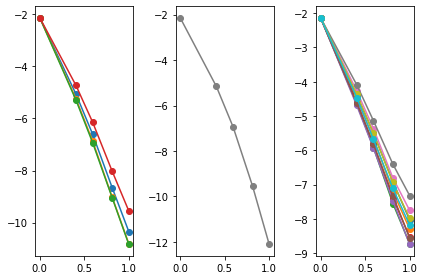

In [21]:
fig, ax = plt.subplots(1,3)
for i in range(0, 4):
    ax[0].plot(results['lam_vals'], results['alchpots'][:,i], '-o')

ax[1].plot(results['lam_vals'], results['alchpots'][:,4], '-o', color='grey') # oxygen
for i in range(5, results['nuclei'].shape[0]):
    ax[2].plot(results['lam_vals'], results['alchpots'][:,i], '-o')
fig.tight_layout()

In [24]:
integral = []
for i in range(results['nuclei'].shape[0]):
    integral.append(np.trapz(results['alchpots'][:,i], results['lam_vals']))
integral = np.array(integral)

In [30]:
e_el = integral*results['nuclei'][:,0]
e_NN = at.nuclear_repulsion(results['nuclei'][:,0], results['nuclei'][:,1:])
e_tot = e_el + e_NN

In [33]:
e_tot

array([ -8.56347744,  -8.03837954,  -8.17834808,  -9.80909074,
       -22.96721602,  -0.31889539,  -0.28029519,  -0.21310195,
        -0.23908447,  -0.21064804,  -0.24279623,  -0.40219972,
        -0.47523653,  -0.35697046,  -0.33123397])

In [32]:
e_tot.sum()

-60.6269737649067